In [15]:
import os
import numpy as np
# 读取训练集、测试集
X_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_train.npy")
X_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_test.npy")
Y_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\Y_train.npy")
Y_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\Y_test.npy")
ids_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_test.npy")
ids_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_train.npy")

In [16]:
# 处理X_train
import os
import numpy as np
import pywt  # 小波变换库
import cv2  # OpenCV 用于调整图像尺寸
from tqdm import tqdm  # 进度条库

# 选择小波基
wavelet = 'morl'
scales = np.arange(1, 128)  # 设定尺度范围
target_size = (128, 128)  # CNN 适配的目标尺寸

# 初始化存储矩阵 (假设所有信号长度相同)
num_samples = X_train.shape[0]
cwt_features = np.zeros((num_samples, target_size[0], target_size[1]), dtype=np.uint8)  # (样本数, 128, 128)

# 遍历所有样本并计算小波变换 (使用 tqdm 进度条)
for i, signal in enumerate(tqdm(X_train, desc="Processing CWT", unit="sample")):
    # 归一化到 [-1, 1]
    signal = signal.astype(np.float32)
    signal = signal / np.max(np.abs(signal))

    # 计算小波变换 (生成二维时频图)
    coefficients, _ = pywt.cwt(signal, scales, wavelet)

   # 取绝对值并归一化到 [0, 255]
    cwt_image = np.abs(coefficients)
    cwt_image = (cwt_image - np.min(cwt_image)) / (np.max(cwt_image) - np.min(cwt_image))  # 归一化到 [0, 1]
    coef_img = (cwt_image * 255).astype(np.uint8)  # 转换为 uint8 格式

    # **调整尺寸到 (128×128)**
    coef_resized = cv2.resize(coef_img, target_size, interpolation=cv2.INTER_CUBIC)

    # 存入特征矩阵
    cwt_features[i] = coef_resized

# 保存转换后的二维特征
output_path = r"D:\Dataset\Temp_Results\Wavelet\X_train_cwt_abs.npy"
np.save(output_path, cwt_features)

print(f"✅ 小波变换完成！二维特征已保存至 {output_path}")


Processing CWT: 100%|██████████| 468/468 [03:03<00:00,  2.55sample/s]

✅ 小波变换完成！二维特征已保存至 D:\Dataset\Temp_Results\Wavelet\X_train_cwt_abs.npy


In [17]:
#处理X_test
import os
import numpy as np
import pywt  # 小波变换库
import cv2  # OpenCV 用于调整图像尺寸
from tqdm import tqdm  # 进度条库

# 选择小波基
wavelet = 'morl'
scales = np.arange(1, 128)  # 设定尺度范围
target_size = (128, 128)  # CNN 适配的目标尺寸

# 初始化存储矩阵 (假设所有信号长度相同)
num_samples = X_test.shape[0]
cwt_features = np.zeros((num_samples, target_size[0], target_size[1]), dtype=np.uint8)  # (样本数, 128, 128)

# 遍历所有样本并计算小波变换 (使用 tqdm 进度条)
for i, signal in enumerate(tqdm(X_test, desc="Processing CWT", unit="sample")):
    # 归一化到 [-1, 1]
    signal = signal.astype(np.float32)
    signal = signal / np.max(np.abs(signal))

    # 计算小波变换 (生成二维时频图)
    coefficients, _ = pywt.cwt(signal, scales, wavelet)

    # 取绝对值并归一化到 [0, 255]
    cwt_image = np.abs(coefficients)
    cwt_image = (cwt_image - np.min(cwt_image)) / (np.max(cwt_image) - np.min(cwt_image))  # 归一化到 [0, 1]
    coef_img = (cwt_image * 255).astype(np.uint8)  # 转换为 uint8 格式

    # **调整尺寸到 (128×128)**
    coef_resized = cv2.resize(coef_img, target_size, interpolation=cv2.INTER_CUBIC)

    # 存入特征矩阵
    cwt_features[i] = coef_resized

# 保存转换后的二维特征
output_path = r"D:\Dataset\Temp_Results\Wavelet\X_test_cwt_abs.npy"
np.save(output_path, cwt_features)

print(f"✅ 小波变换完成！二维特征已保存至 {output_path}")


Processing CWT: 100%|██████████| 117/117 [00:44<00:00,  2.65sample/s]

✅ 小波变换完成！二维特征已保存至 D:\Dataset\Temp_Results\Wavelet\X_test_cwt_abs.npy


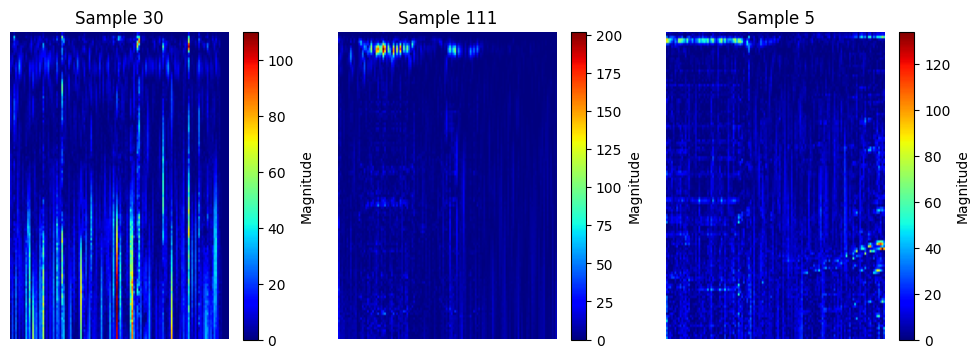

In [18]:
import random
import matplotlib.pyplot as plt

# 随机选择 3 个样本索引
random_indices = random.sample(range(num_samples), 3)

# **绘制随机选择的 3 张小波变换图像**
plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cwt_features[idx], cmap='jet', aspect='auto')
    plt.colorbar(label="Magnitude")
    plt.title(f"Sample {idx}")
    plt.axis("off")  # 关闭坐标轴
plt.show()